In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Online-Retail.csv to Online-Retail.csv


In [ ]:
df = pd.read_csv("Online-Retail.csv", sep=',')
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


None

In [ ]:
df.dropna(subset=['CustomerID'], inplace=True)
df['CustomerID'] = df['CustomerID'].astype(int)
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]

In [ ]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


customer_data = df.groupby('CustomerID').agg({
    'TotalPrice': 'sum',
    'InvoiceNo': 'count',
    'StockCode': 'nunique'
}).rename(columns={'InvoiceNo': 'NumTransactions', 'StockCode': 'UniqueProducts'})


scaler = StandardScaler()
customer_scaled = scaler.fit_transform(customer_data)


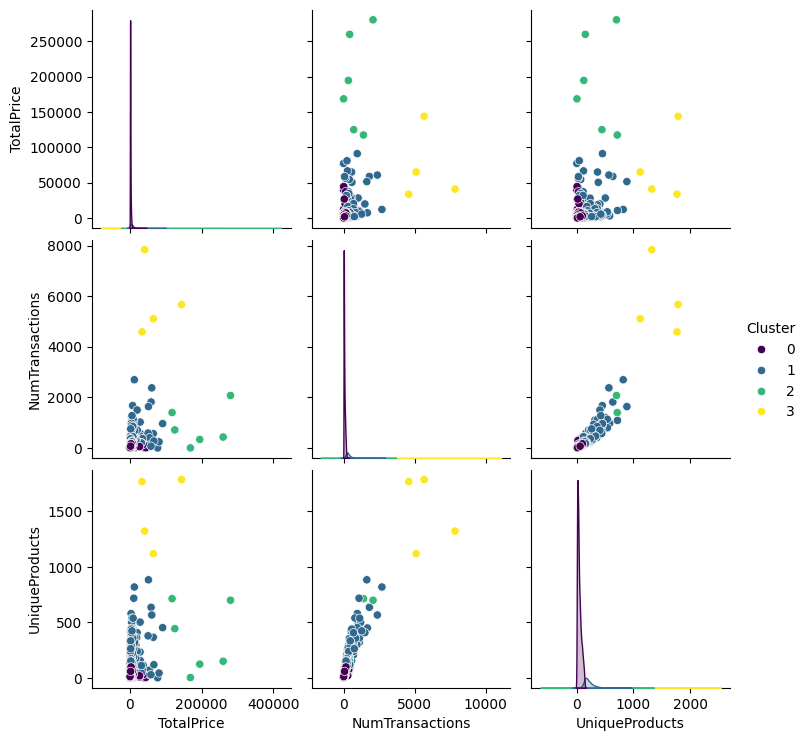

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
customer_data['Cluster'] = kmeans.fit_predict(customer_scaled)


sns.pairplot(customer_data, hue='Cluster', palette='viridis')
plt.show()

In [ ]:
cluster_summary = customer_data.groupby('Cluster').mean()
display(cluster_summary)

,TotalPrice,NumTransactions,UniqueProducts
Cluster,,,
0,1095.130652,49.674419,39.801411
1,6569.782395,358.465070,212.255489
2,190863.461667,826.833333,355.833333
3,70925.287500,5807.000000,1499.250000


In [ ]:
marketing_strategies = {
    0: "High-value customers: Offer loyalty programs and premium services.",
    1: "Frequent buyers: Provide exclusive discounts and personalized recommendations.",
    2: "Low spenders: Engage with targeted promotions and product bundles.",
    3: "Occasional buyers: Send reminders and limited-time offers."
}

for cluster, strategy in marketing_strategies.items():
    print(f"Cluster {cluster}: {strategy}")

Cluster 0: High-value customers: Offer loyalty programs and premium services.
Cluster 1: Frequent buyers: Provide exclusive discounts and personalized recommendations.
Cluster 2: Low spenders: Engage with targeted promotions and product bundles.
Cluster 3: Occasional buyers: Send reminders and limited-time offers.
